In [ ]:
#STEP 1 — Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# For consistent results
np.random.seed(42)

In [ ]:
# STEP 2 — Load Dataset
df = pd.read_csv('/content/adhdata.csv', low_memory=False)
print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
display(df.head())

✅ Dataset loaded successfully.
Shape: (2166383, 21)


,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T7,T8,P7,P8,Fz,Cz,Pz,Class,ID
0,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,...,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0,ADHD,v10p
1,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,...,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0,ADHD,v10p
2,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,...,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0,ADHD,v10p
3,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,...,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0,ADHD,v10p
4,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,...,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0,ADHD,v10p


In [ ]:
# STEP 3 — Check Missing Values
print("\n🔍 Checking missing values:")
display(df.isnull().sum())


🔍 Checking missing values:


,0
Fp1,0
Fp2,0
F3,0
F4,0
C3,0
C4,0
P3,0
P4,0
O1,0
O2,0


In [ ]:
# STEP 4 — Encode Categorical Columns ('ID' and 'Class')
df_encoded = pd.get_dummies(df, columns=['ID', 'Class'])
print("\n✅ One-hot encoding completed.")
display(df_encoded.head())



✅ One-hot encoding completed.


,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,ID_v55p,ID_v56p,ID_v57p,ID_v58p,ID_v59p,ID_v60p,ID_v6p,ID_v8p,Class_ADHD,Class_Control
0,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,...,False,False,False,False,False,False,False,False,True,False
1,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,...,False,False,False,False,False,False,False,False,True,False
2,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,...,False,False,False,False,False,False,False,False,True,False
3,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,...,False,False,False,False,False,False,False,False,True,False
4,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# STEP 5 — Define Features (X) and Target (y)
y = df_encoded['Class_ADHD']  # Target
X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'ID_' in col] +
                             ['Class_Control', 'Class_ADHD'])

print("\n✅ Feature and target defined.")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Feature and target defined.
X shape: (2166383, 19)
y shape: (2166383,)


In [ ]:
# 🧠 STEP 6 — Split Data (Before Scaling ✅)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n✅ Dataset split complete.")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))


✅ Dataset split complete.
Train shape: (1733106, 19) Test shape: (433277, 19)
Class distribution in training set:
Class_ADHD
True     0.557182
False    0.442818
Name: proportion, dtype: float64


In [ ]:
# STEP 7 — Scale Numerical Features (Fit on Train, Apply on Test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit only on training data
X_test_scaled = scaler.transform(X_test)        # transform test data

print("\n✅ Data scaled correctly (no data leakage).")
print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)


✅ Data scaled correctly (no data leakage).
Scaled train shape: (1733106, 19)
Scaled test shape: (433277, 19)


In [ ]:
# STEP 8 — Train Logistic Regression Model

logistic_model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',  # handle imbalance
    n_jobs=-1
)
logistic_model.fit(X_train_scaled, y_train)
print("\n✅ Logistic Regression model trained successfully.")


✅ Logistic Regression model trained successfully.


In [ ]:
# STEP 9 — Evaluate Model
y_pred = logistic_model.predict(X_test_scaled)
y_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, y_prob)[:2])
cm = confusion_matrix(y_test, y_pred)

# Print results
print("\n📊 Logistic Regression Results (After Correct Scaling)")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



📊 Logistic Regression Results (After Correct Scaling)
Accuracy:  0.5011
Precision: 0.5582
Recall:    0.5018
F1-score:  0.5285
AUC Score: 0.5009

Classification Report:
               precision    recall  f1-score   support

       False       0.44      0.50      0.47    191863
        True       0.56      0.50      0.53    241414

    accuracy                           0.50    433277
   macro avg       0.50      0.50      0.50    433277
weighted avg       0.51      0.50      0.50    433277



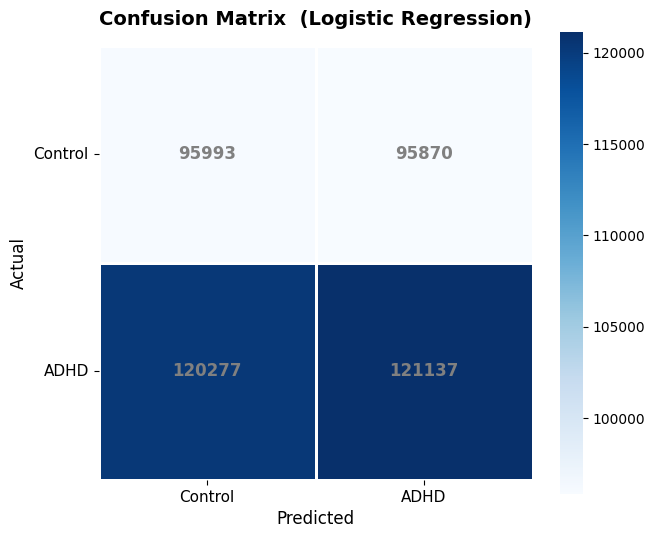

In [ ]:
# STEP 10 — Confusion Matrix Heatmap
plt.figure(figsize=(7,6))

# Create heatmap using a softer blue gradient
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    square=True,
    linewidths=1,
    linecolor='white',
    annot_kws={"size": 12, "weight": "bold", "color": "gray"}  # gray text looks good on blue
)

# Title and labels in professional style
plt.title("Confusion Matrix  (Logistic Regression)", fontsize=14, weight='bold', pad=15)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)

# Set custom tick labels
plt.xticks(ticks=[0.5, 1.5], labels=['Control', 'ADHD'], fontsize=11)
plt.yticks(ticks=[0.5, 1.5], labels=['Control', 'ADHD'], fontsize=11, rotation=0)

plt.show()

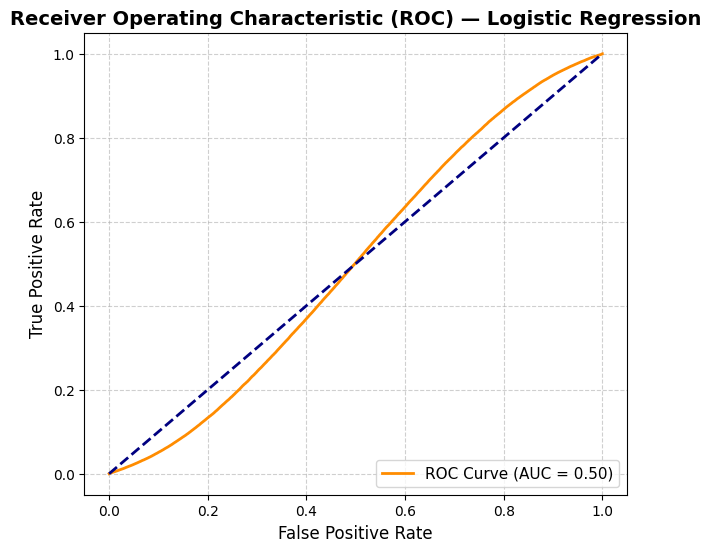

In [ ]:
# STEP 11 — ROC Curve Visualization
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--', lw=2)
plt.title("Receiver Operating Characteristic (ROC) — Logistic Regression", fontsize=14, weight='bold')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-558066737.py:26: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


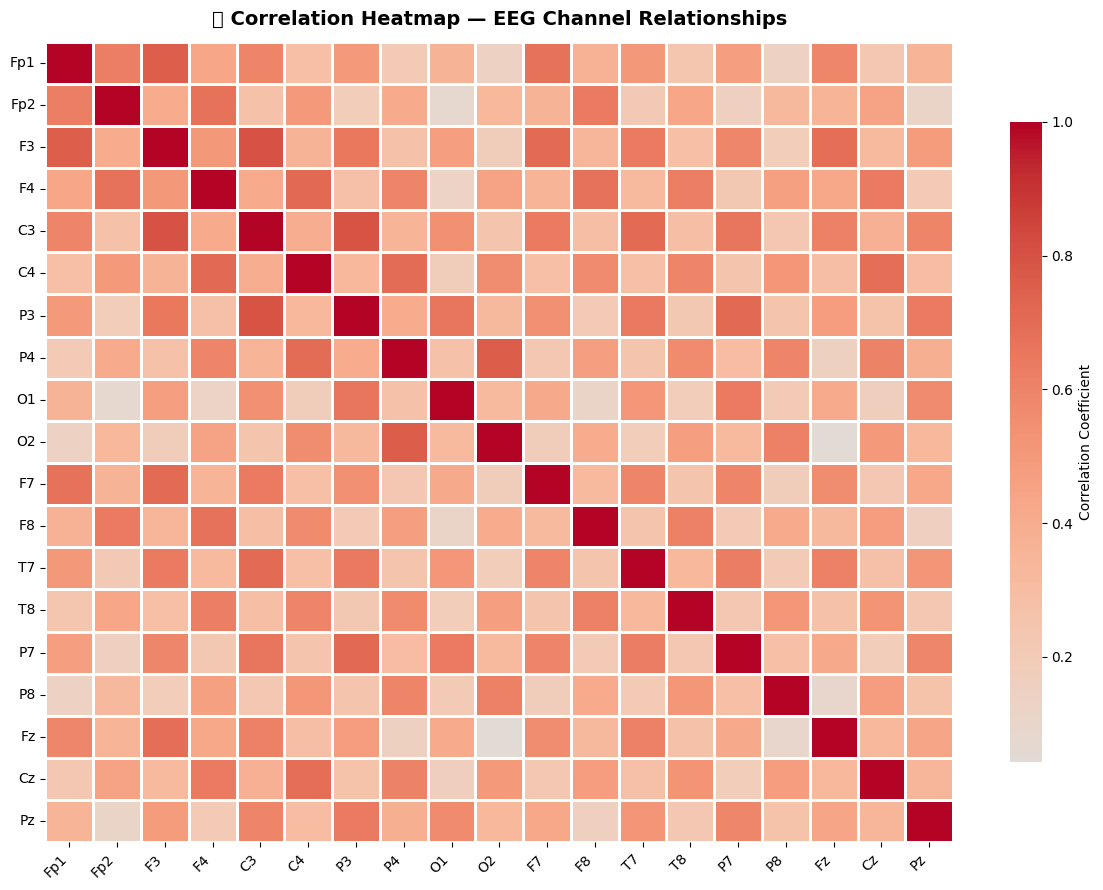

In [ ]:
#STEP 12 — Correlation Heatmap (Feature Relationships)
import seaborn as sns
import matplotlib.pyplot as plt

# Select only EEG numerical features (exclude ID/Class)
eeg_features = [col for col in df.columns if col not in ['ID', 'Class']]

# Compute correlation matrix
corr_matrix = df[eeg_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',       # red-blue diverging colormap for contrast
    center=0,
    annot=False,           # set to True if you want numeric values inside cells
    linewidths=0.8,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)

plt.title("🧩 Correlation Heatmap — EEG Channel Relationships", fontsize=14, weight='bold', pad=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()